# TensorFlow

Until now, we've always used numpy to build neural networks. Now we will step you through a deep learning framework that will allow you to build neural networks more easily. Machine learning frameworks like TensorFlow, PaddlePaddle, Torch, Caffe, Keras, and many others can speed up our machine learning development significantly. All of these frameworks also have a lot of documentation. In this notebook, I will learn to do the following in TensorFlow: 

- Initialize variables
- Start my own session
- Train algorithms 
- Implement a Neural Network

## 1 - Exploring the Tensorflow Library

To start, let's will import the library as well as other required modules:

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

%matplotlib inline
np.random.seed(1)

Now that we have imported the library, we will walk you through its different applications. We will start with an example, where we compute the loss of one training example. 

$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [34]:
y_hat = tf.constant(36, name='y_hat')            # Define y_hat constant. Set to 36.
y = tf.constant(39, name='y')                    # Define y. Set to 39

loss = tf.Variable((y - y_hat)**2, name='loss')  # Create a variable for the loss

init = tf.global_variables_initializer()         # When init is run later (session.run(init)),
                                                 # the loss variable will be initialized and ready to be computed
with tf.Session() as session:                    # Create a session and print the output
    session.run(init)                            # Initializes the variables
    print(session.run(loss))                     # Prints the loss

9


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated. 
2. Write operations between those Tensors.
3. Initialize Tensors. 
4. Create a Session. 
5. Run the Session. This will run the operations written above. 

Therefore, when we created a variable for the loss, we simply defined the loss as a function of other quantities, but did not evaluate its value. To evaluate it, we had to run `init=tf.global_variables_initializer()`. That initialized the loss variable, and in the last line we were finally able to evaluate the value of `loss` and print its value.

Now let us look at an easy example.

In [35]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a,b)
print(c)

Tensor("Mul_2:0", shape=(), dtype=int32)


As expected, we did not see 20! We got a tensor saying that the result is a tensor that does not have the shape attribute, and is of type "int32". All we did was put in the 'computation graph', but you have not run this computation yet. In order to actually multiply the two numbers, we will have to create a session and run it.

In [36]:
sess = tf.Session()
print(sess.run(c))

20


Next, let's have a look at placeholders. A placeholder is an object whose value we can specify only later. 
To specify values for a placeholder, we can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [37]:
# Change the value of x in the feed_dict

x = tf.placeholder(tf.int64, name = 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


When we first defined `x`, we did not have to specify a value for it. A placeholder is simply a variable that we assign data to only later, when running the session. We say that you **feed data** to these placeholders when running the session. 

**Here's what's happening:**

When we specify the operations needed for a computation, we are telling TensorFlow how to construct a computation graph. The computation graph can have some placeholders whose values we will specify only later. Finally, when we run the session, we are telling TensorFlow to execute the computation graph.

### 1.1 - Linear function

Lets start by computing the following equation: $Y = WX + b$, where $W$ and $X$ are random matrices and b is a random vector. 

In [0]:
def linear_function():
    """
    Implements a linear function: 
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    np.random.seed(1)
    
    X = tf.constant(np.random.randn(3, 1), name='X')
    W = tf.constant(np.random.randn(4, 3), name='W')
    b = tf.constant(np.random.randn(4, 1), name='b')
    Y = tf.add(tf.matmul(W, X), b)
    
    # Create and run session
    
    with tf.Session() as sess:
        result = sess.run(Y)

    return result

In [39]:
print( "result = " + str(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


### 1.2 - Computing the sigmoid 

Tensorflow offers a variety of commonly used neural network functions like `tf.sigmoid` and `tf.softmax`. Lets compute the sigmoid function of an input. 

We will do this exercise using a placeholder variable `x`. When running the session, we should use the feed dictionary to pass in the input `z`. We will also have to (i) create a placeholder `x`, (ii) define the operations needed to compute the sigmoid using `tf.sigmoid`, and then (iii) run the session. 

**Implement the sigmoid function below**

- `tf.placeholder(tf.float32, name = "...")`
- `tf.sigmoid(...)`
- `sess.run(..., feed_dict = {x: z})`


Note that there are two typical ways to create and use sessions in tensorflow: 

**Method 1:**
```python
sess = tf.Session()
# Run the variables initialization (if needed), run the operations
result = sess.run(..., feed_dict = {...})
sess.close() # Close the session
```
**Method 2:**
```python
with tf.Session() as sess: 
    # run the variables initialization (if needed), run the operations
    result = sess.run(..., feed_dict = {...})
    # This takes care of closing the session
```

In [0]:
def sigmoid(z):
    """
    Computes the sigmoid of z
    
    Arguments:
    z -- input value, scalar or vector
    
    Returns: 
    results -- the sigmoid of z
    """

    # Create a placeholder for x. Name it 'x'.
    x = tf.placeholder(tf.float32, name='x')

    # compute sigmoid(x)
    sigmoid = tf.sigmoid(x)

    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x: z})
    
    return result

In [41]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938


**To summarize, we now know how to:**
1. Create placeholders
2. Specify the computation graph corresponding to operations we want to compute
3. Create the session
4. Run the session, using a feed dictionary if necessary to specify placeholder variables' values. 

### 1.3 -  Computing the Cost

We can also use a built-in function to compute the cost of our neural network. So instead of needing to write code to compute this as a function of $a^{[2](i)}$ and $y^{(i)}$ for i=1...m: 
$$ J = - \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log a^{ [2] (i)} + (1-y^{(i)})\log (1-a^{ [2] (i)} )\large )\small\tag{2}$$

we can do it in one line of code in tensorflow!

Let's implement the cross entropy loss. The function we will use is: 

- `tf.nn.sigmoid_cross_entropy_with_logits(logits = ...,  labels = ...)`

The code should input `z`, compute the sigmoid (to get `a`) and then compute the cross entropy cost $J$. All this can be done using one call to `tf.nn.sigmoid_cross_entropy_with_logits`, which computes

$$- \frac{1}{m}  \sum_{i = 1}^m  \large ( \small y^{(i)} \log \sigma(z^{[2](i)}) + (1-y^{(i)})\log (1-\sigma(z^{[2](i)})\large )\small\tag{2}$$



In [0]:
def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing logits (z), output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Returns:
    cost -- runs the session of the cost
    """

    # Create the placeholders for "logits" (z) and "labels" (y)
    z = tf.placeholder(tf.float32, name='z')
    y = tf.placeholder(tf.float32, name='y')
    
    # Use the loss function
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    # Create and run a session 
    with tf.Session() as sess:
        cost = sess.run(cost, feed_dict={z: logits, y:labels})
    
    return cost

In [43]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053872  1.0366409  0.41385433 0.39956614]


### 1.4 - Using One Hot encodings

Many times in deep learning we will have a y vector with numbers ranging from 0 to C-1, where C is the number of classes. If C is for example 4, then we might have the following y vector which you will need to convert as follows:


<img src="images/onehot.png" style="width:600px;height:150px;">

This is called a "one hot" encoding, because in the converted representation exactly one element of each column is "hot" (meaning set to 1). To do this conversion in numpy, we might have to write a few lines of code. In tensorflow, we can use one line of code: 

- tf.one_hot(labels, depth, axis) 

In [0]:
def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                     
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    
    # Create a tf.constant equal to C (depth), name it 'C'. 
    C = tf.constant(C, name='C')
    
    # Use tf.one_hot
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0) # Axis 0 as we want to expand to C rows
    
    # Create and run session
    with tf.Session() as sess:
        one_hot = sess.run(one_hot_matrix)
    
    return one_hot

In [45]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### 1.5 - Initialize with zeros and ones

Now we will initialize a vector of zeros and ones. The function we will be calling is `tf.ones()`. To initialize with zeros we could use tf.zeros() instead. These functions take in a shape and return an array of dimension shape full of zeros and ones respectively. 

Let's implement a function to take in a shape and to return an array (of the shape's dimension of ones). 

 - tf.ones(shape)

In [0]:
def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array to create
        
    Returns: 
    ones -- array containing only ones
    """

    # Create "ones" tensor using tf.ones(...).
    ones = tf.ones(shape)
    
    # Create  and run the session
    with tf.Session() as sess:
        ones = sess.run(ones)

    return ones

In [47]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


# 2 - Building a neural network in tensorflow

I will now build a neural network using tensorflow. 

There are two parts to implement a tensorflow model:

- Create the computation graph
- Run the graph

Let's delve into the problem we'd like to solve!

### 2.0 - Problem statement: SIGNS Dataset

One afternoon, with some friends we decided to teach our computers to decipher sign language. We spent a few hours taking pictures in front of a white wall and came up with the following dataset. It's now our job to build an algorithm that would facilitate communications from a speech-impaired person to someone who doesn't understand sign language.

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

Note that this is a subset of the SIGNS dataset. The complete dataset contains many more signs and more examples at a higher resolution.

Here are examples for each number, and how an explanation of how represent the labels are represented. These are the original pictures, before lowering the image resolutoion to 64 by 64 pixels.

<img src="images/hands.png" style="width:800px;height:350px;">

In [0]:
# Set the paths for the data sets to be used located in the same folder of my google drive
# Note that by default we are in /content and so this has to be removed from the full path obtained from the Files menu

train_path = "drive/My Drive/Data Science/deeplearning.ai/02 - Hyperparameter tuning, Regularization and Optimization/Tensorflow/datasets/train_signs.h5"
test_path = "drive/My Drive/Data Science/deeplearning.ai/02 - Hyperparameter tuning, Regularization and Optimization/Tensorflow/datasets/test_signs.h5"

In [0]:
def load_dataset():
    """
    Loads the dataset from the h5 files in the datasets folder
    """
    train_dataset = h5py.File(train_path, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # train set labels

    
    test_dataset = h5py.File(test_path, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

Visualize some examples in the dataset.

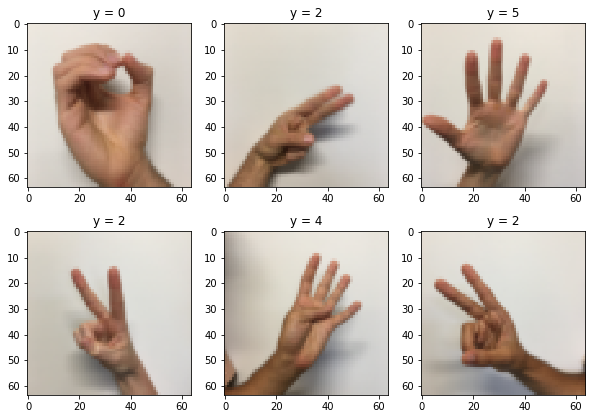

In [51]:
# Examples of a picture
fig = plt.figure(figsize=(10,7))

for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.imshow(X_train_orig[i])
    title = "y = " + str(np.squeeze(Y_train_orig[:, i]))
    ax.set_title(title)

As usual we flatten the image dataset, then normalize it by dividing by 255. On top of that, ywe will convert each label to a one-hot vector.

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [53]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors.

**Our goal** is to build an algorithm capable of recognizing a sign with high accuracy. To do so, we are going to build a tensorflow model that is almost the same as one we have previously built in numpy for cat recognition (but now using a softmax output). 

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### 2.1 - Create placeholders

The first task is to create placeholders for `X` and `Y`. This will allow us to later pass training data in when  a session is run. 

In [0]:
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, size of an image vector (num_px * num_px = 64 * 64 * 3 = 12288)
    n_y -- scalar, number of classes (from 0 to 5, so -> 6)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Note:
    - We will use None because it let's us be flexible on the number of examples we will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    X = tf.placeholder(tf.float32, shape=[n_x, None], name='X')
    Y = tf.placeholder(tf.float32, shape=[n_y, None], name='Y')
    
    return X, Y

In [55]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_10:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_4:0", shape=(6, ?), dtype=float32)


### 2.2 - Initializing the parameters

The second task is to initialize the parameters in tensorflow.

Let's implement a function to initialize the parameters in tensorflow. We are going use Xavier Initialization for weights and Zero Initialization for biases.

In [0]:
def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # For reproducability
        
    W1 = tf.get_variable("W1", [25, 12288], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [57]:
# Reset tensorflow graph
tf.reset_default_graph()

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


As expected, the parameters haven't been evaluated yet.

### 2.3 - Forward propagation in tensorflow 

We will now implement the forward propagation module in tensorflow. The function will take in a dictionary of parameters and it will complete the forward pass. The functions we will be using are: 

- `tf.add(...,...)` to do an addition
- `tf.matmul(...,...)` to do a matrix multiplication
- `tf.nn.relu(...)` to apply the ReLU activation

**Note** In the below forard_propogation() function the numpy equivalents have been commented in so that we can compare the tensorflow implementation to numpy. It is important to note that the forward propagation stops at `z3`. The reason is that in tensorflow the last linear layer output is given as input to the function computing the loss. Therefore, we don't need `a3`!

In [0]:
def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
                                         # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1, X), b1)    # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                  # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2)   # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                  # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)   # Z3 = np.dot(W3,Z2) + b3
    
    return Z3

In [59]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


Notice that the forward propagation doesn't output any cache. This is explained below, when we get to brackpropagation.

### 2.4 Compute cost

As seen before, it is very easy to compute the cost using:
```python
tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = ..., labels = ...))
```
let's implement the cost function below. 

- It is important to know that the "`logits`" and "`labels`" inputs of `tf.nn.softmax_cross_entropy_with_logits` are expected to be of shape (number of examples, num_classes). Thus Z3 and Y need to be transposed in this implementation but with a standard implentation such as one where the data is compliled using pandas so that each row represents a different example and each column a different feature, the matrices would not need to be transposed.
- Besides, `tf.reduce_mean` basically does the summation over the examples.

In [0]:
def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # To fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    # Create cost tensor
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=labels))
    
    return cost

In [61]:
# Reset graph
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### 2.5 - Backward propagation & parameter updates

This is where tensorflow becomes really useful. All the backpropagation and the parameters update is taken care of in 1 line of code. It is very easy to incorporate this line in the model.

After computing the cost function. We will create an "`optimizer`" object. We have to call this object along with the cost when running the tf.session. When called, it will perform an optimization on the given cost with the chosen method and learning rate.

For instance, for gradient descent the optimizer would be:
```python
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate).minimize(cost)
```

To make the optimization we would use:
```python
_ , c = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
```

This computes the backpropagation by passing through the tensorflow graph in the reverse order. From cost to inputs.

**Note:** 

When coding, we often use `_` as a "throwaway" variable to store values that we won't need to use later. Here, `_` takes on the evaluated value of `optimizer`, which we don't need (and `c` takes the value of the `cost` variable). 

### Additional:

I want to use minibatches for the model so let's implement the function random_mini_batches() to enable this.

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label", of shape (1, number of examples)
    mini_batch_size - size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X[:, permutation]
    shuffled_Y = Y[:, permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:, k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:, num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

### 2.6 - Building the model

Now, let's bring it all together! 

In [0]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X, Y = create_placeholders(n_x, n_y)

    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer using AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.          # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feed_dict should contain a minibatch for (X,Y).
                _ , minibatch_cost = sess.run([optimizer, cost], 
                                             feed_dict={X: minibatch_X, 
                                                        Y: minibatch_Y})
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print (f"Cost after epoch {epoch}: {epoch_cost}")
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters

Cost after epoch 0: 1.8557019089207505
Cost after epoch 100: 1.0164577473293652
Cost after epoch 200: 0.7331024751518711
Cost after epoch 300: 0.5729151666164399
Cost after epoch 400: 0.4686893865917668
Cost after epoch 500: 0.3809471171010624
Cost after epoch 600: 0.31381642592675757
Cost after epoch 700: 0.25417795461235626
Cost after epoch 800: 0.20379619435830548
Cost after epoch 900: 0.1664852527054874
Cost after epoch 1000: 0.14096723880731699
Cost after epoch 1100: 0.10788452783317277
Cost after epoch 1200: 0.08632906814190473
Cost after epoch 1300: 0.06095791698405235
Cost after epoch 1400: 0.05091985388461386


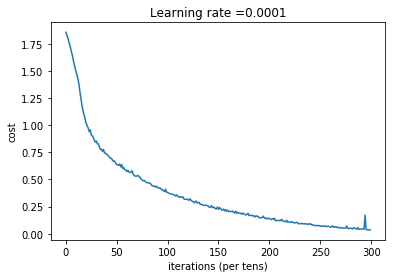

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [64]:
parameters = model(X_train, Y_train, X_test, Y_test)

**Expected Output**:


The algorithm can recognize a sign representing a figure between 0 and 5 with 72.5% accuracy.

**Insights**:
- The model seems big enough to fit the training set well. However, given the difference between train and test accuracy, we could try to add L2 or dropout regularization to reduce overfitting. 
- We can think about the session as a block of code to train the model. Each time the session is run on a minibatch, it trains the parameters. In total ths session is run large number of times (1500 epochs) until well trained parameters are obtained.

**Things to remember**:
- Tensorflow is a programming framework used in deep learning
- The two main object classes in tensorflow are Tensors and Operators. 
- When coding in tensorflow you have to take the following steps:
    - Create a graph containing Tensors (Variables, Placeholders ...) and Operations (tf.matmul, tf.add, ...)
    - Create a session
    - Initialize the session
    - Run the session to execute the graph
- The graph can be executed multiple times as seen in model()
- The backpropagation and optimization is automatically done when running the session on the "optimizer" object.